In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("stock_price.csv")

In [3]:
df.head()

,日付け,終値,始値,高値,安値,出来高,変化率 %
0,2024-08-01,156.3,159.3,159.4,156.1,79.15M,-2.56%
1,2024-07-31,160.4,158.2,160.7,158.1,173.91M,1.07%
2,2024-07-30,158.7,158.8,159.2,158.0,138.14M,-0.63%
3,2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14%
4,2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13%


In [4]:
#rename columns to english for simplicity

df = df.rename( columns = { "日付け": "Date", "終値": "Closing Price", "始値": "Open Price","高値": "Highest","安値": "Lowest","出来高": "Volume","変化率 %": "Change %" })

In [5]:
df.head()

,Date,Closing Price,Open Price,Highest,Lowest,Volume,Change %
0,2024-08-01,156.3,159.3,159.4,156.1,79.15M,-2.56%
1,2024-07-31,160.4,158.2,160.7,158.1,173.91M,1.07%
2,2024-07-30,158.7,158.8,159.2,158.0,138.14M,-0.63%
3,2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14%
4,2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13%


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9202 non-null   object 
 1   Closing Price  9202 non-null   float64
 2   Open Price     9202 non-null   float64
 3   Highest        9202 non-null   float64
 4   Lowest         9202 non-null   float64
 5   Volume         9202 non-null   object 
 6   Change %       9202 non-null   object 
dtypes: float64(4), object(3)
memory usage: 503.4+ KB


In [7]:
df.shape

(9202, 7)

In [8]:
df.isnull().sum()

Date             0
Closing Price    0
Open Price       0
Highest          0
Lowest           0
Volume           0
Change %         0
dtype: int64

In [9]:
#convert volume from object to float

def convert_volume(volume):
    if 'M' in volume:
        return float(volume.replace('M', '')) * 1e6
    elif 'B' in volume:
        return float(volume.replace('B', '')) * 1e9
    else:
        return float(volume)

df['Volume'] = df['Volume'].apply(convert_volume)

In [10]:
#convert change % from object to float

df['Change %'] = df['Change %'].str.replace('%', '').astype(float)
df['Change %'] = df['Change %']/100

In [11]:
df.head()

,Date,Closing Price,Open Price,Highest,Lowest,Volume,Change %
0,2024-08-01,156.3,159.3,159.4,156.1,79150000.0,-0.0256
1,2024-07-31,160.4,158.2,160.7,158.1,173910000.0,0.0107
2,2024-07-30,158.7,158.8,159.2,158.0,138140000.0,-0.0063
3,2024-07-29,159.7,158.7,160.2,158.4,126280000.0,0.0114
4,2024-07-26,157.9,159.3,159.6,157.9,155080000.0,-0.0013


In [12]:
#convert date to datetime

df['Date'] = pd.to_datetime(df['Date'])

# EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9202 non-null   datetime64[ns]
 1   Closing Price  9202 non-null   float64       
 2   Open Price     9202 non-null   float64       
 3   Highest        9202 non-null   float64       
 4   Lowest         9202 non-null   float64       
 5   Volume         9202 non-null   float64       
 6   Change %       9202 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 503.4 KB


In [14]:
df.describe()

,Date,Closing Price,Open Price,Highest,Lowest,Volume,Change %
count,9202,9202.000000,9202.000000,9202.000000,9202.000000,9.202000e+03,9202.000000
mean,2005-10-21 08:44:04.642469248,92.180961,92.256183,93.176451,91.330146,1.726677e+08,0.000175
min,1987-02-12 00:00:00,33.000000,33.000000,33.200000,32.200000,9.340000e+06,-0.147400
25%,1996-06-06 06:00:00,52.000000,52.100000,52.800000,51.500000,8.073000e+07,-0.009400
50%,2005-10-11 12:00:00,85.100000,85.100000,86.050000,84.200000,1.540150e+08,0.000000
75%,2015-03-04 18:00:00,110.800000,110.800000,111.900000,109.275000,2.305225e+08,0.009000
max,2024-08-01 00:00:00,305.900000,309.800000,311.800000,303.900000,1.280000e+09,0.162500
std,NaN,50.452228,50.598215,51.049837,50.087405,1.251280e+08,0.018767


### The standard deviation of the closing price is high (around $50), indicating substantial price fluctuations over the years.
### The volume shows a wide range, from as low as ~9 million shares to as high as 1.28 billion, suggesting periods of both low and high trading activity.

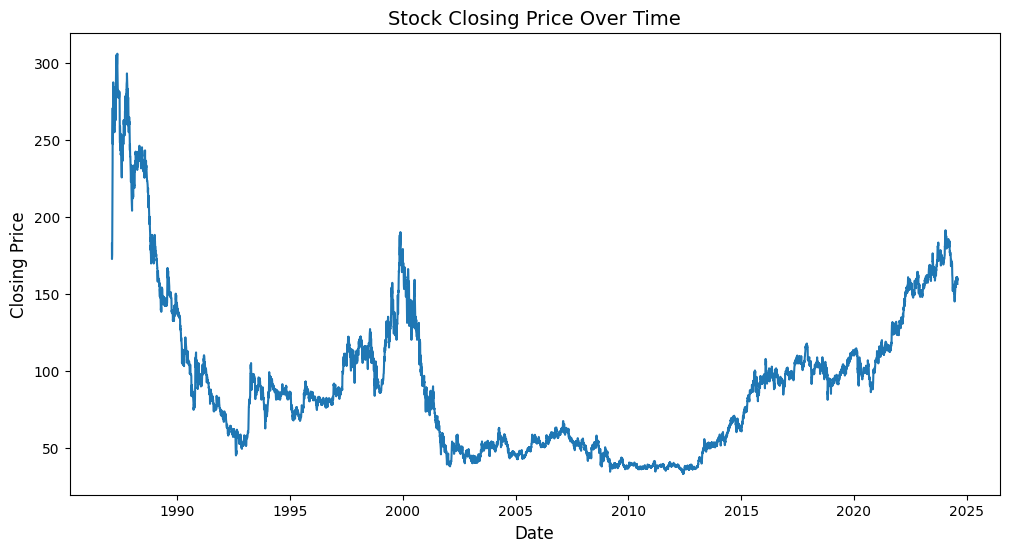

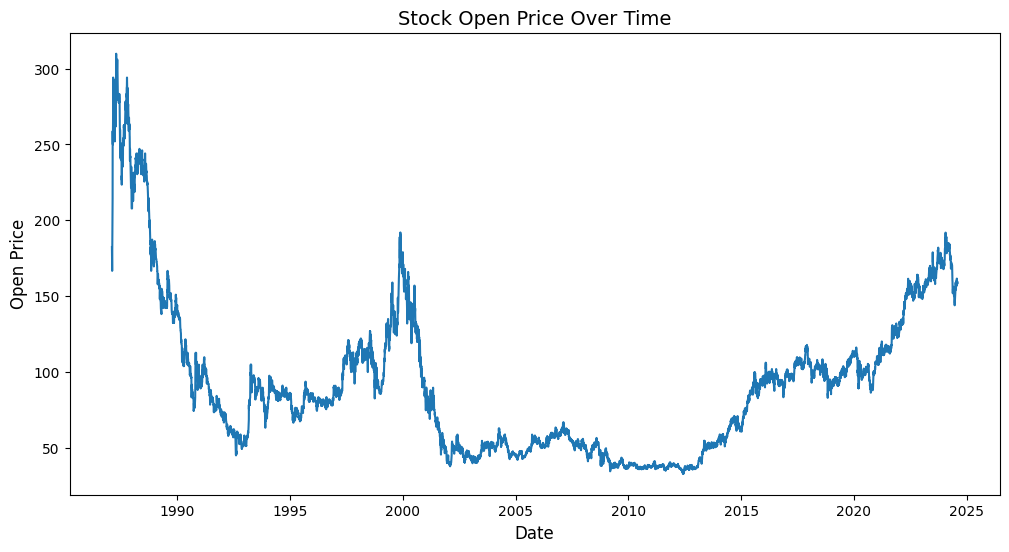

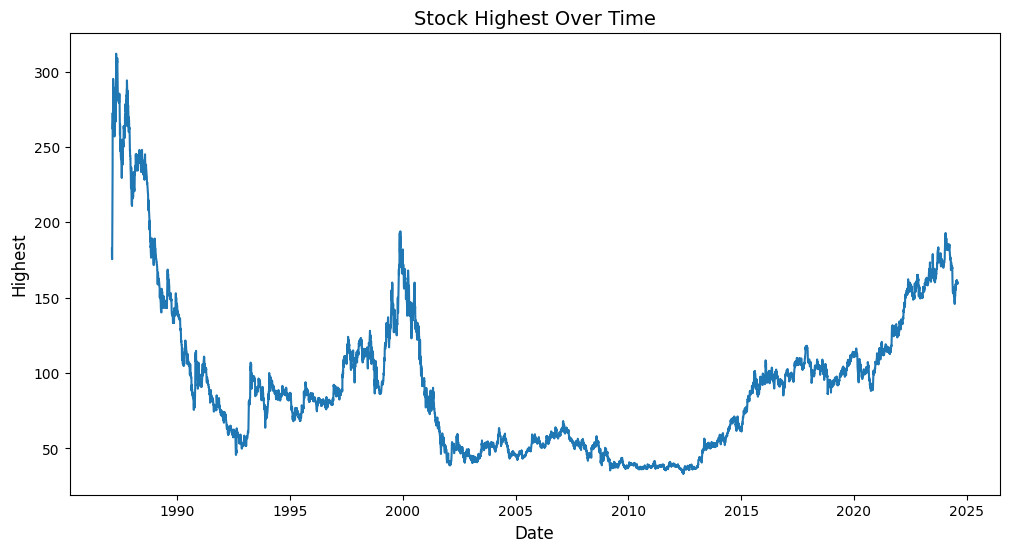

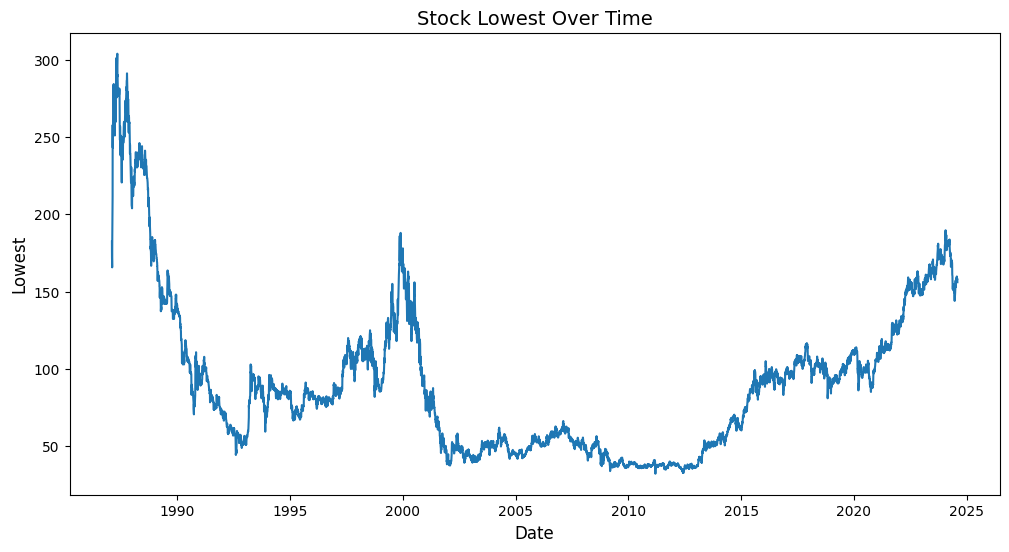

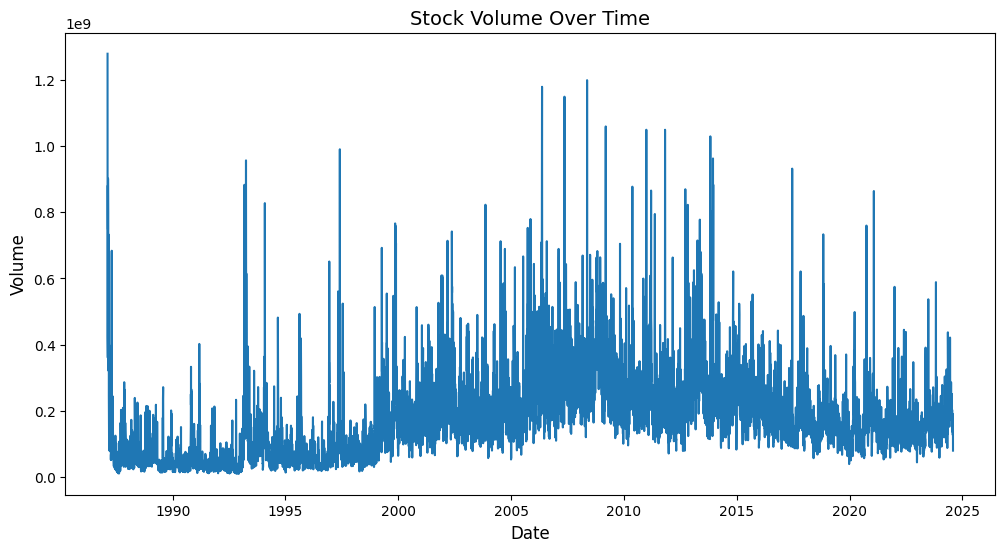

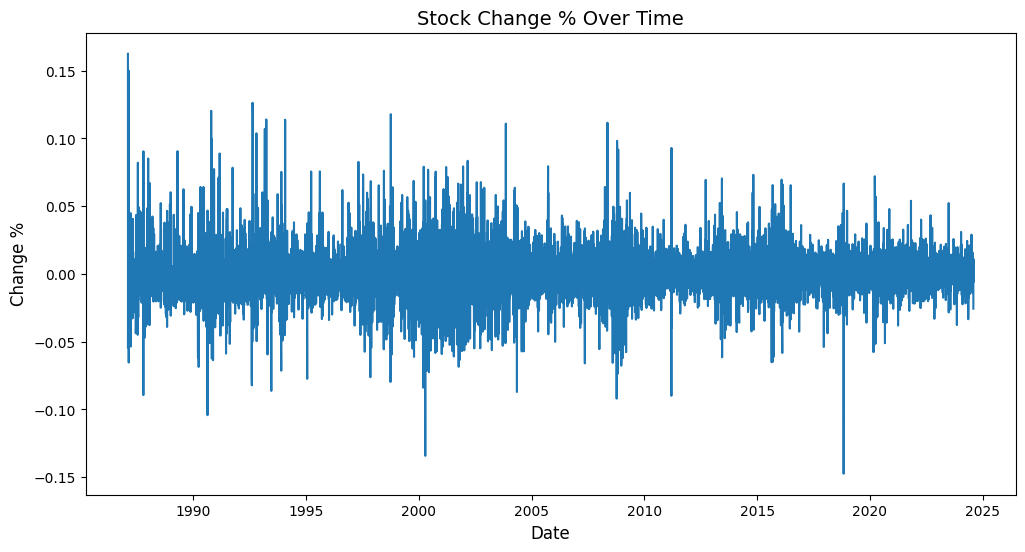

In [15]:
#plot of every column with date

columns_to_plot = ['Closing Price', 'Open Price', 'Highest', 'Lowest', 'Volume', 'Change %']

for column in columns_to_plot:
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df[column])
    plt.title(f'Stock {column} Over Time', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.show()

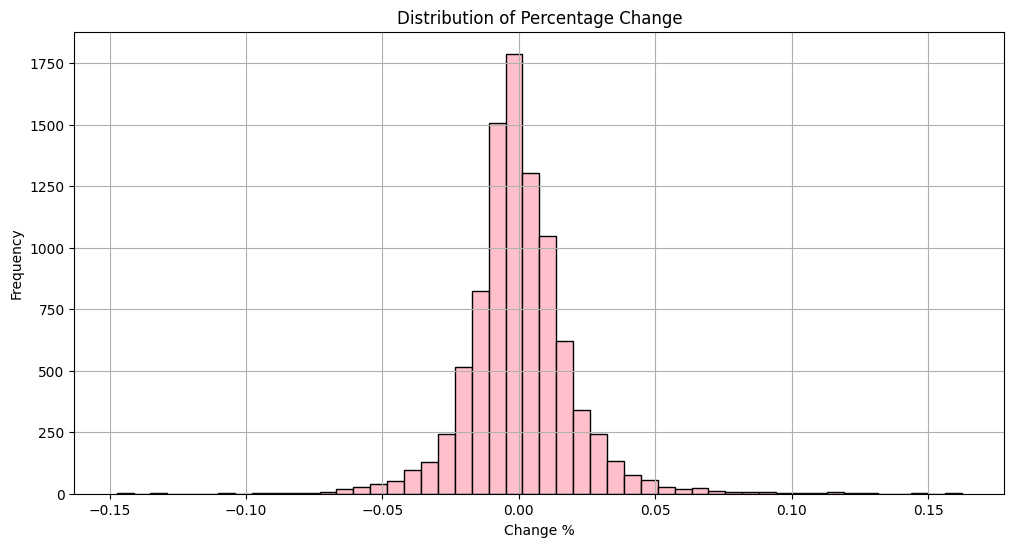

In [16]:
#freq of change %

plt.figure(figsize=(12,6))
plt.hist(df['Change %'], bins=50, color='pink', edgecolor='black')
plt.title('Distribution of Percentage Change')
plt.xlabel('Change %')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Stable Market: Most price changes are small and follows normal distribution as shown, indicating stability. Large fluctuations are rare.
### Predictability: A normal distribution suggests the stock’s short-term price movements are more predictable, as extreme changes are uncommon.

In [17]:
df['Volatility_20d'] = df['Closing Price'].rolling(window=20).std()
df['Volatility_252d'] = df['Closing Price'].rolling(window=252).std()

In [18]:
df['MA_20d'] = df['Closing Price'].rolling(window=20).mean()
df['MA_50d'] = df['Closing Price'].rolling(window=50).mean()

In [19]:
df['Rolling_Std_20d'] = df['Closing Price'].rolling(window=20).std()
df['Rolling_Std_50d'] = df['Closing Price'].rolling(window=50).std()

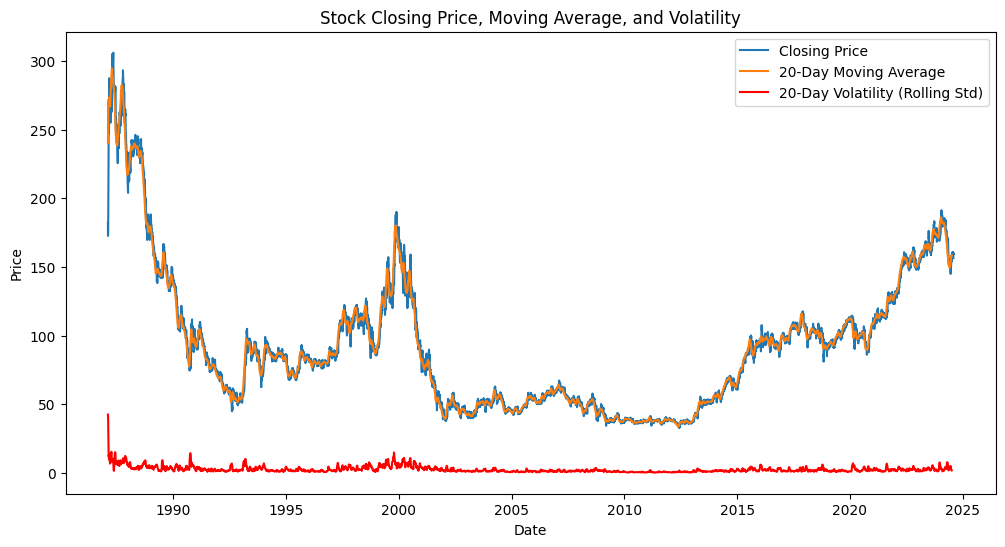

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Closing Price'], label='Closing Price')
plt.plot(df['Date'], df['MA_20d'], label='20-Day Moving Average')
plt.plot(df['Date'], df['Volatility_20d'], label='20-Day Volatility (Rolling Std)', color='red')

plt.title('Stock Closing Price, Moving Average, and Volatility')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()

## Why we add moving average and volatility to our data? 

#### The 20-day moving average smooths short-term price fluctuations, making it easier to identify long-term trends in the stock's price behavior.
#### The 20-day volatility (rolling standard deviation) shows periods of increased or decreased risk, highlighting when the stock price is more volatile.

#### If the 20-day Moving Average closely follows the Closing Price, it indicates that the stock price doesn’t fluctuate much in the short term, suggesting stability and a consistent price trend without large deviations. 
#### The abnormal and distant 20-day Volatility suggests that the stock experiences sudden spikes or drops in volatility during certain periods, even if the overall price trend is stable. This can indicate occasional market shocks or events causing short-term unpredictability, despite general price stability.

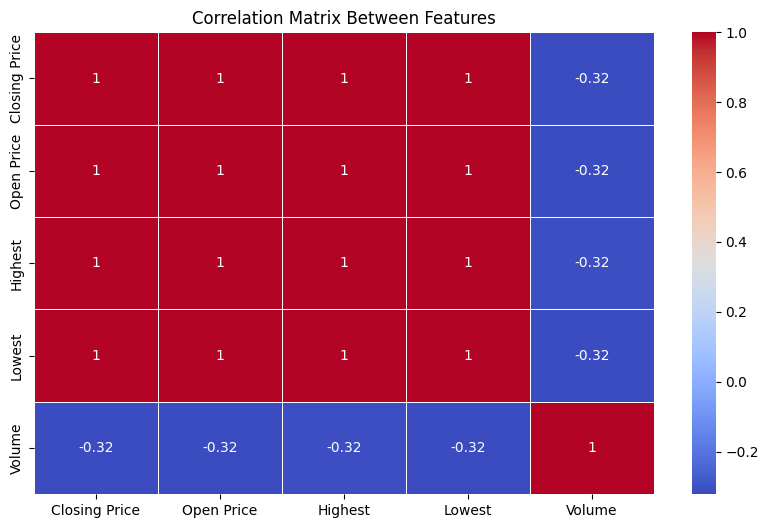

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['Closing Price', 'Open Price', 'Highest', 'Lowest', 'Volume']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Between Features')
plt.show()

#### Correlation of 1 between Opening, Closing, Highest, and Lowest prices suggests that these price metrics are nearly identical in their movement—when one increases or decreases, the others follow in the same manner. This is typical for stock price data, where these values are closely related as they represent different points within the same trading day.

#### The negative correlation of -0.32 between these prices and Volume indicates a weak inverse relationship. This suggests that when trading volume increases, prices tend to slightly decrease, or when volume decreases, prices rise slightly. However, since the correlation is not strong, volume is not a major driver of price changes in this case.

           Date  Closing Price        Volume   Price_Z  Volume_Z
185  2023-10-30          173.7  5.889000e+08  1.615767  3.326453
634  2021-12-29          125.0  5.747600e+08  0.650497  3.213449
860  2021-01-28          106.2  8.645900e+08  0.277868  5.529718
940  2020-09-30           86.0  7.600600e+08 -0.122511  4.694333
1396 2018-11-07           89.9  5.833400e+08 -0.045210  3.282019
...         ...            ...           ...       ...       ...
9195 1987-02-20          210.8  9.022700e+08  2.351116  5.830849
9196 1987-02-19          196.1  7.482500e+08  2.059751  4.599950
9197 1987-02-18          191.2  7.950900e+08  1.962630  4.974286
9198 1987-02-17          182.4  8.815100e+08  1.788207  5.664939
9201 1987-02-12          182.4  1.280000e+09  1.788207  8.849599

[305 rows x 5 columns]


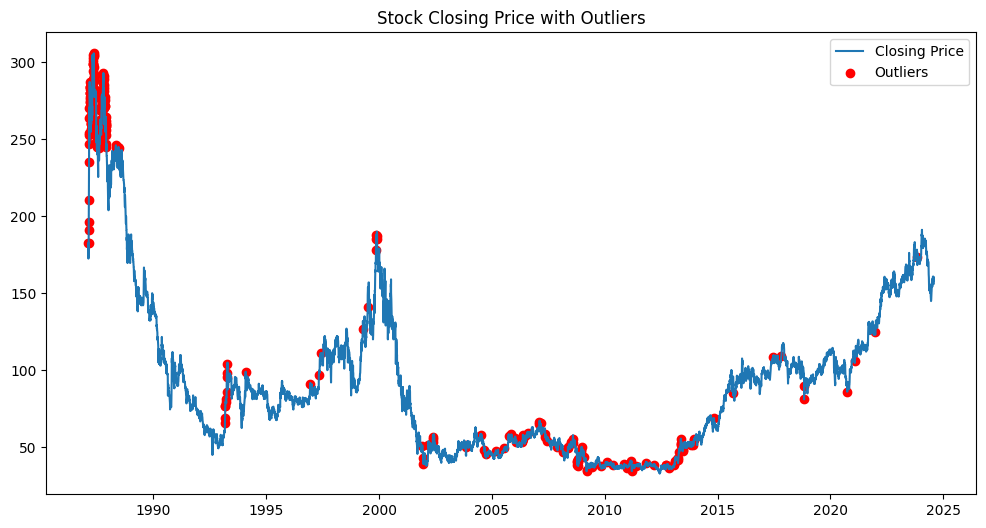

In [22]:
import numpy as np

df['Price_Z'] = (df['Closing Price'] - df['Closing Price'].mean()) / df['Closing Price'].std()
df['Volume_Z'] = (df['Volume'] - df['Volume'].mean()) / df['Volume'].std()

outliers = df[(np.abs(df['Price_Z']) > 3) | (np.abs(df['Volume_Z']) > 3)]

print(outliers[['Date', 'Closing Price', 'Volume', 'Price_Z', 'Volume_Z']])

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Closing Price'], label='Closing Price')
plt.scatter(outliers['Date'], outliers['Closing Price'], color='red', label='Outliers', marker='o')
plt.title('Stock Closing Price with Outliers')
plt.legend()
plt.show()

#### This code calculates Z-scores for the Closing Price and Volume, measuring how far each value deviates from their respective means in terms of standard deviations. By identifying points where the Z-scores exceed 3, it flags these as outliers, meaning they are more than three standard deviations away from the average, which makes them statistically abnormal.

#### The plot visualizes the Closing Price over time, highlighting these outliers in red. These outliers can represent significant events such as price spikes, crashes, or sudden volume surges. Identifying such anomalies helps in understanding unusual market behavior that may be tied to external factors or significant market activity.

#### Since there are only 305 outliers from 9200 rows of data, this indicates that extreme price or volume fluctuations are relatively rare, comprising only a small fraction of the overall dataset (about 3.3%). Most of the stock's price and volume movements fall within normal ranges, suggesting a generally stable and predictable stock with occasional spikes or drops.

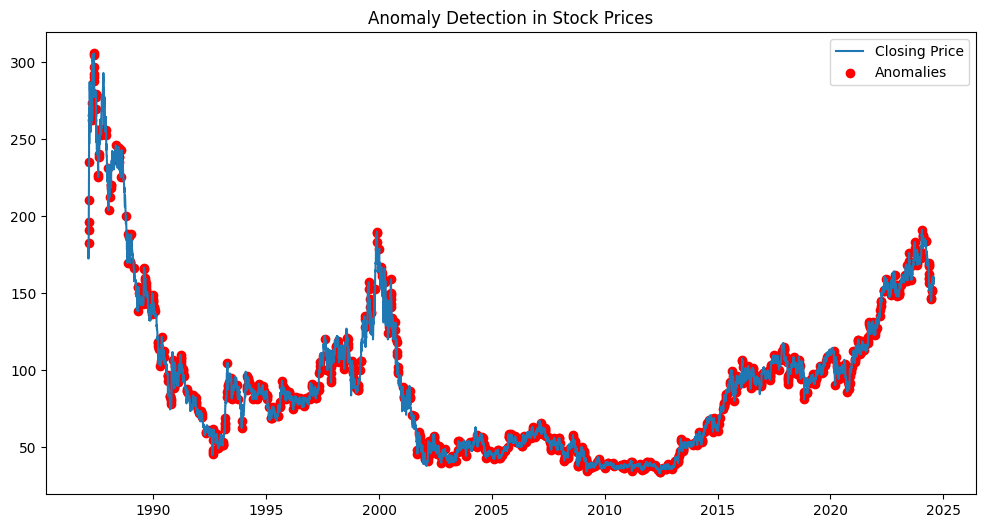

In [23]:
df['Rolling_Mean'] = df['Closing Price'].rolling(window=20).mean()
df['Rolling_Std'] = df['Closing Price'].rolling(window=20).std()

df['Anomaly'] = np.where((df['Closing Price'] > df['Rolling_Mean'] + 2 * df['Rolling_Std']) | 
                         (df['Closing Price'] < df['Rolling_Mean'] - 2 * df['Rolling_Std']), True, False)

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Closing Price'], label='Closing Price')
plt.scatter(df[df['Anomaly']]['Date'], df[df['Anomaly']]['Closing Price'], color='red', label='Anomalies')
plt.title('Anomaly Detection in Stock Prices')
plt.legend()
plt.show()

#### The 20-day rolling mean and standard deviation of the closing price are calculated to establish a baseline for typical price behavior. Anomalies are defined as points where the closing price deviates from the rolling mean by more than 2 standard deviations. This method allows for the identification of significant price movements that fall outside the normal range, highlighting potential outlier events.

#### The resulting plot displays the closing prices over time, with detected anomalies marked in red. These anomalies indicate periods of unusual price activity that could be attributed to significant market events, such as news releases or earnings reports. Identifying these anomalies helps investors and analysts recognize important shifts in stock behavior that may warrant further investigation or action.

In [24]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df['Closing Price'])

print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
print('Critical Values:', adf_test[4])


ADF Statistic: -1.6418950595274635
p-value: 0.4612707414699141
Critical Values: {'1%': -3.4310631630047332, '5%': -2.8618551724921812, '10%': -2.5669377612579782}


#### The results of the Augmented Dickey-Fuller (ADF) test indicate that the ADF statistic is approximately -1.64 with a p-value of 0.46. Since the p-value is significantly higher than the typical significance level of 0.05, we fail to reject the null hypothesis, which suggests that the time series has a unit root and is non-stationary.

#### Additionally, comparing the ADF statistic to the critical values shows that -1.64 is greater than the critical values at the 1%, 5%, and 10% significance levels. This further confirms that the series is non-stationary. To make the time series stationary, you may need to apply differencing or other transformations before performing any further analysis or modeling.

<Figure size 1200x1000 with 0 Axes>

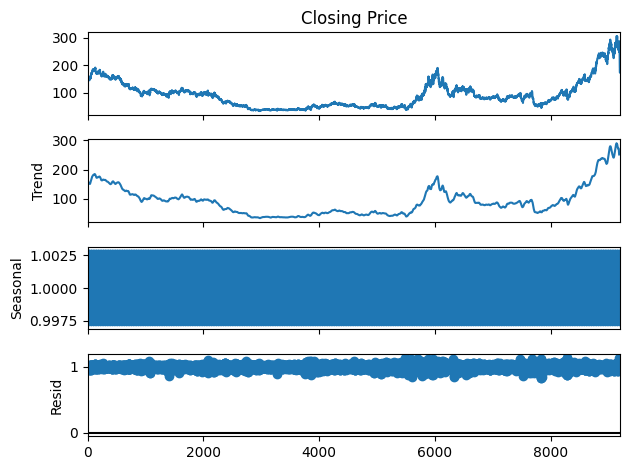

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Closing Price'], model='multiplicative', period=30)

plt.figure(figsize=(12, 10))
decomposition.plot()
plt.show()

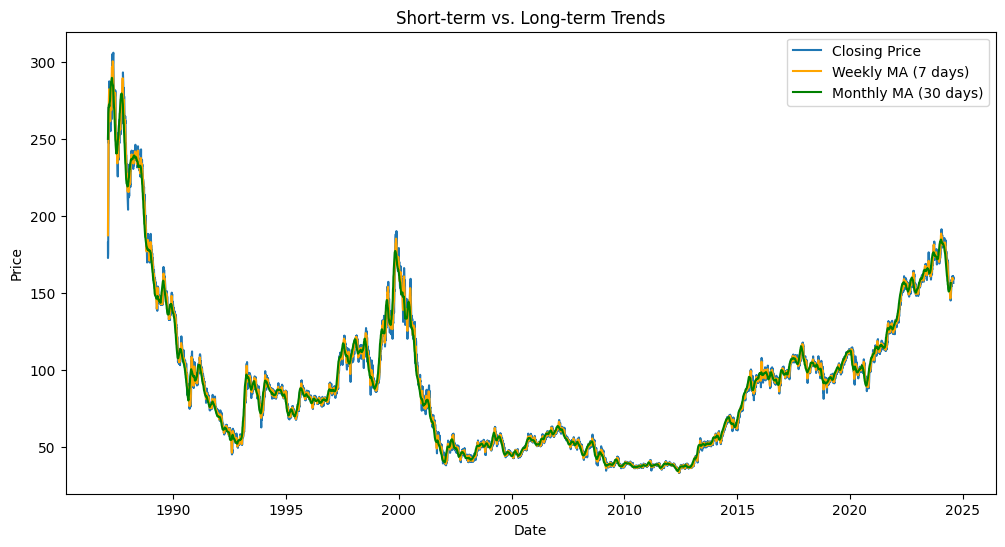

In [27]:
df['Weekly_MA'] = df['Closing Price'].rolling(window=7).mean()
df['Monthly_MA'] = df['Closing Price'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Closing Price'], label='Closing Price')

plt.plot(df['Date'], df['Weekly_MA'], label='Weekly MA (7 days)', color='orange')
plt.plot(df['Date'], df['Monthly_MA'], label='Monthly MA (30 days)', color='green')

plt.title('Short-term vs. Long-term Trends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### The plot of the Closing Price, Weekly Moving Average (7 days), and Monthly Moving Average (30 days) shows that all three lines closely track each other, indicating a strong correlation between the short-term and long-term price trends. This similarity suggests that the stock has relatively consistent price behavior, with no significant fluctuations or volatility over the observed period.

#### When the moving averages align closely with the actual closing prices, it indicates that the stock is likely experiencing stable trends, making it easier for investors to identify ongoing patterns without the noise of more extreme short-term movements. This stability could be appealing for long-term investors, as it suggests predictable price movements and reduced risk.

In [28]:
df.head()

,Date,Closing Price,Open Price,Highest,Lowest,Volume,Change %,Volatility_20d,Volatility_252d,MA_20d,MA_50d,Rolling_Std_20d,Rolling_Std_50d,Price_Z,Volume_Z,Rolling_Mean,Rolling_Std,Anomaly,Weekly_MA,Monthly_MA
0,2024-08-01,156.3,159.3,159.4,156.1,79150000.0,-0.0256,NaN,NaN,NaN,NaN,NaN,NaN,1.270886,-0.747376,NaN,NaN,False,NaN,NaN
1,2024-07-31,160.4,158.2,160.7,158.1,173910000.0,0.0107,NaN,NaN,NaN,NaN,NaN,NaN,1.352151,0.009928,NaN,NaN,False,NaN,NaN
2,2024-07-30,158.7,158.8,159.2,158.0,138140000.0,-0.0063,NaN,NaN,NaN,NaN,NaN,NaN,1.318456,-0.275939,NaN,NaN,False,NaN,NaN
3,2024-07-29,159.7,158.7,160.2,158.4,126280000.0,0.0114,NaN,NaN,NaN,NaN,NaN,NaN,1.338277,-0.370722,NaN,NaN,False,NaN,NaN
4,2024-07-26,157.9,159.3,159.6,157.9,155080000.0,-0.0013,NaN,NaN,NaN,NaN,NaN,NaN,1.302599,-0.140557,NaN,NaN,False,NaN,NaN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             9202 non-null   datetime64[ns]
 1   Closing Price    9202 non-null   float64       
 2   Open Price       9202 non-null   float64       
 3   Highest          9202 non-null   float64       
 4   Lowest           9202 non-null   float64       
 5   Volume           9202 non-null   float64       
 6   Change %         9202 non-null   float64       
 7   Volatility_20d   9183 non-null   float64       
 8   Volatility_252d  8951 non-null   float64       
 9   MA_20d           9183 non-null   float64       
 10  MA_50d           9153 non-null   float64       
 11  Rolling_Std_20d  9183 non-null   float64       
 12  Rolling_Std_50d  9153 non-null   float64       
 13  Price_Z          9202 non-null   float64       
 14  Volume_Z         9202 non-null   float64

# Standardising the data

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

columns_to_standardize = [
    'Closing Price', 'Open Price', 'Highest', 'Lowest', 
    'Volume', 'Change %', 'Volatility_20d', 
    'Volatility_252d', 'MA_20d', 'MA_50d', 
    'Rolling_Std_20d', 'Rolling_Std_50d', 
    'Price_Z', 'Volume_Z', 'Rolling_Mean', 
    'Rolling_Std', 'Weekly_MA', 'Monthly_MA'
]

scaler = StandardScaler()

df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

print(df.head())

        Date  Closing Price  Open Price   Highest    Lowest    Volume  \
0 2024-08-01       1.270955    1.325095  1.297304  1.293207 -0.747417   
1 2024-07-31       1.352225    1.303354  1.322771  1.333139  0.009929   
2 2024-07-30       1.318528    1.315213  1.293386  1.331143 -0.275954   
3 2024-07-29       1.338349    1.313237  1.312976  1.339129 -0.370742   
4 2024-07-26       1.302670    1.325095  1.301222  1.329146 -0.140565   

   Change %  Volatility_20d  Volatility_252d  MA_20d  MA_50d  Rolling_Std_20d  \
0 -1.373521             NaN              NaN     NaN     NaN              NaN   
1  0.560864             NaN              NaN     NaN     NaN              NaN   
2 -0.345046             NaN              NaN     NaN     NaN              NaN   
3  0.598166             NaN              NaN     NaN     NaN              NaN   
4 -0.078602             NaN              NaN     NaN     NaN              NaN   

   Rolling_Std_50d   Price_Z  Volume_Z  Rolling_Mean  Rolling_Std  Anomaly

In [31]:
df

,Date,Closing Price,Open Price,Highest,Lowest,Volume,Change %,Volatility_20d,Volatility_252d,MA_20d,MA_50d,Rolling_Std_20d,Rolling_Std_50d,Price_Z,Volume_Z,Rolling_Mean,Rolling_Std,Anomaly,Weekly_MA,Monthly_MA
0,2024-08-01,1.270955,1.325095,1.297304,1.293207,-0.747417,-1.373521,NaN,NaN,NaN,NaN,NaN,NaN,1.270955,-0.747417,NaN,NaN,False,NaN,NaN
1,2024-07-31,1.352225,1.303354,1.322771,1.333139,0.009929,0.560864,NaN,NaN,NaN,NaN,NaN,NaN,1.352225,0.009929,NaN,NaN,False,NaN,NaN
2,2024-07-30,1.318528,1.315213,1.293386,1.331143,-0.275954,-0.345046,NaN,NaN,NaN,NaN,NaN,NaN,1.318528,-0.275954,NaN,NaN,False,NaN,NaN
3,2024-07-29,1.338349,1.313237,1.312976,1.339129,-0.370742,0.598166,NaN,NaN,NaN,NaN,NaN,NaN,1.338349,-0.370742,NaN,NaN,False,NaN,NaN
4,2024-07-26,1.302670,1.325095,1.301222,1.329146,-0.140565,-0.078602,NaN,NaN,NaN,NaN,NaN,NaN,1.302670,-0.140565,NaN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9197,1987-02-18,1.962736,1.858740,1.920258,1.896186,4.974557,2.559196,12.344613,2.556198,3.362598,3.584022,12.344613,5.894818,1.962736,4.974557,3.362598,12.344613,True,2.719414,3.396820
9198,1987-02-17,1.788304,1.665047,1.785089,1.680551,5.665247,2.084925,14.306358,2.620770,3.267826,3.542885,14.306358,6.819892,1.788304,5.665247,3.267826,14.306358,True,2.535962,3.341247
9199,1987-02-16,1.651534,1.471354,1.612699,1.484882,1.501283,0.917899,16.023013,2.695631,3.163288,3.496986,16.023013,7.710762,1.651534,1.501283,3.163288,16.023013,False,2.316501,3.285007
9200,1987-02-13,1.592069,1.665047,1.632289,1.620652,1.995764,-2.902911,17.310700,2.772933,3.051873,3.445919,17.310700,8.458564,1.592069,1.995764,3.051873,17.310700,False,2.038346,3.216959


In [32]:
df.isnull().sum()

Date                 0
Closing Price        0
Open Price           0
Highest              0
Lowest               0
Volume               0
Change %             0
Volatility_20d      19
Volatility_252d    251
MA_20d              19
MA_50d              49
Rolling_Std_20d     19
Rolling_Std_50d     49
Price_Z              0
Volume_Z             0
Rolling_Mean        19
Rolling_Std         19
Anomaly              0
Weekly_MA            6
Monthly_MA          29
dtype: int64

In [33]:
#filling the null values with using methods like forward fill and backward fill

df_ffill = df.fillna(method='ffill')

df_bfill = df.fillna(method='bfill')

print("Missing values after forward fill:")
print(df_ffill.isnull().sum())

print("\nMissing values after backward fill:")
print(df_bfill.isnull().sum())

Missing values after forward fill:
Date                 0
Closing Price        0
Open Price           0
Highest              0
Lowest               0
Volume               0
Change %             0
Volatility_20d      19
Volatility_252d    251
MA_20d              19
MA_50d              49
Rolling_Std_20d     19
Rolling_Std_50d     49
Price_Z              0
Volume_Z             0
Rolling_Mean        19
Rolling_Std         19
Anomaly              0
Weekly_MA            6
Monthly_MA          29
dtype: int64

Missing values after backward fill:
Date               0
Closing Price      0
Open Price         0
Highest            0
Lowest             0
Volume             0
Change %           0
Volatility_20d     0
Volatility_252d    0
MA_20d             0
MA_50d             0
Rolling_Std_20d    0
Rolling_Std_50d    0
Price_Z            0
Volume_Z           0
Rolling_Mean       0
Rolling_Std        0
Anomaly            0
Weekly_MA          0
Monthly_MA         0
dtype: int64


/tmp/ipykernel_22178/947711254.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')
/tmp/ipykernel_22178/947711254.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill')


In [34]:
df = df_bfill
df.head()

,Date,Closing Price,Open Price,Highest,Lowest,Volume,Change %,Volatility_20d,Volatility_252d,MA_20d,MA_50d,Rolling_Std_20d,Rolling_Std_50d,Price_Z,Volume_Z,Rolling_Mean,Rolling_Std,Anomaly,Weekly_MA,Monthly_MA
0,2024-08-01,1.270955,1.325095,1.297304,1.293207,-0.747417,-1.373521,-0.363773,0.412459,1.323454,1.260615,-0.363773,0.240536,1.270955,-0.747417,1.323454,-0.363773,False,1.317581,1.288053
1,2024-07-31,1.352225,1.303354,1.322771,1.333139,0.009929,0.560864,-0.363773,0.412459,1.323454,1.260615,-0.363773,0.240536,1.352225,0.009929,1.323454,-0.363773,False,1.317581,1.288053
2,2024-07-30,1.318528,1.315213,1.293386,1.331143,-0.275954,-0.345046,-0.363773,0.412459,1.323454,1.260615,-0.363773,0.240536,1.318528,-0.275954,1.323454,-0.363773,False,1.317581,1.288053
3,2024-07-29,1.338349,1.313237,1.312976,1.339129,-0.370742,0.598166,-0.363773,0.412459,1.323454,1.260615,-0.363773,0.240536,1.338349,-0.370742,1.323454,-0.363773,False,1.317581,1.288053
4,2024-07-26,1.302670,1.325095,1.301222,1.329146,-0.140565,-0.078602,-0.363773,0.412459,1.323454,1.260615,-0.363773,0.240536,1.302670,-0.140565,1.323454,-0.363773,False,1.317581,1.288053


In [35]:

# Relative Strength Index (RSI): Identifies overbought or oversold conditions in the market, helping traders decide when to buy or sell based on momentum.\

def calculate_rsi(data, window=14):
    delta = data['Closing Price'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df['RSI'] = calculate_rsi(df)

# Moving Average Convergence Divergence (MACD) : Indicates potential bullish or bearish trends through crossovers between the MACD line and the signal line, serving as a momentum trading signal.

df['EMA_12'] = df['Closing Price'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Closing Price'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']

# Average True Range (ATR): Measures market volatility, allowing traders to assess risk and adjust position sizes or stop-loss levels accordingly.

def calculate_atr(data, window=14):
    high_low = data['Highest'] - data['Lowest']
    high_close = (data['Highest'] - data['Closing Price'].shift()).abs()
    low_close = (data['Lowest'] - data['Closing Price'].shift()).abs()
    true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    return true_range.rolling(window=window).mean()

df['ATR'] = calculate_atr(df)

df.dropna(inplace=True)

print(df.head())

         Date  Closing Price  Open Price   Highest    Lowest    Volume  \
13 2024-07-12       1.318528    1.317190  1.318853  1.341126  0.622535   
14 2024-07-11       1.334385    1.319166  1.314935  1.339129  0.444308   
15 2024-07-10       1.310599    1.263825  1.275755  1.285220  0.430801   
16 2024-07-09       1.274920    1.226272  1.250288  1.241295  0.337931   
17 2024-07-08       1.231312    1.240108  1.216986  1.229315  0.622695   

    Change %  Volatility_20d  Volatility_252d    MA_20d  ...  Rolling_Mean  \
13 -0.275771       -0.363773         0.412459  1.323454  ...      1.323454   
14  0.395669       -0.363773         0.412459  1.323454  ...      1.323454   
15  0.603495       -0.363773         0.412459  1.323454  ...      1.323454   
16  0.752704       -0.363773         0.412459  1.323454  ...      1.323454   
17 -0.558202       -0.363773         0.412459  1.323454  ...      1.323454   

    Rolling_Std  Anomaly  Weekly_MA  Monthly_MA        RSI    EMA_12  \
13    -0.36377

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9189 entries, 13 to 9201
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             9189 non-null   datetime64[ns]
 1   Closing Price    9189 non-null   float64       
 2   Open Price       9189 non-null   float64       
 3   Highest          9189 non-null   float64       
 4   Lowest           9189 non-null   float64       
 5   Volume           9189 non-null   float64       
 6   Change %         9189 non-null   float64       
 7   Volatility_20d   9189 non-null   float64       
 8   Volatility_252d  9189 non-null   float64       
 9   MA_20d           9189 non-null   float64       
 10  MA_50d           9189 non-null   float64       
 11  Rolling_Std_20d  9189 non-null   float64       
 12  Rolling_Std_50d  9189 non-null   float64       
 13  Price_Z          9189 non-null   float64       
 14  Volume_Z         9189 non-null   float64    

# Model-1 : Support Vector Machine

MSE: 3.23937, MAE: 1.21469, MAPE: 46.28642%, R-Squared: -1.20986


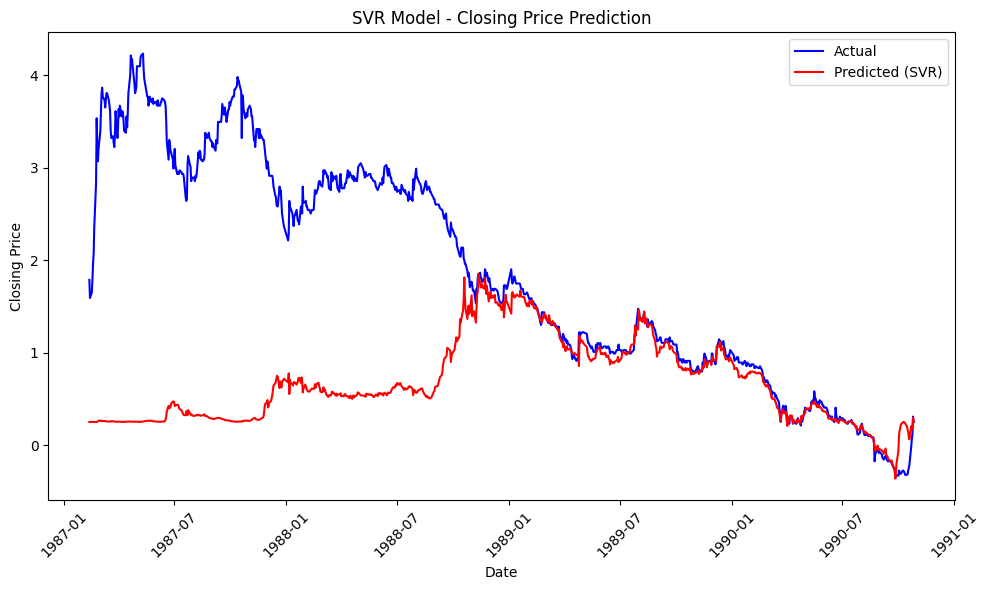

In [49]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Split data into training and testing sets (90% train, 10% test)
train_size = int(len(df) * 0.9)
train_data, test_data = df['Closing Price'][:train_size], df['Closing Price'][train_size:]

# Use your features as exogenous variables
exog_features = ['Open Price', 'Highest', 'Lowest', 'Volume', 'Change %', 'Volatility_20d', 
                 'Volatility_252d', 'MA_20d', 'MA_50d', 'Rolling_Std_20d', 'Rolling_Std_50d', 
                 'Price_Z', 'Volume_Z', 'Rolling_Mean', 'Rolling_Std', 'Weekly_MA', 
                 'Monthly_MA', 'RSI', 'EMA_12', 'EMA_26', 'MACD', 'ATR']
exog_train = df[exog_features][:train_size]
exog_test = df[exog_features][train_size:]

# Standardize the features
scaler = StandardScaler()
exog_train_scaled = scaler.fit_transform(exog_train)
exog_test_scaled = scaler.transform(exog_test)

# Train SVR model
svr_model = SVR(kernel='rbf')  # You can experiment with different kernels like 'linear', 'poly', etc.
svr_model.fit(exog_train_scaled, train_data)

# Make predictions
svr_predictions = svr_model.predict(exog_test_scaled)

# Evaluate performance
mse_svr = mean_squared_error(test_data, svr_predictions)
mae_svr = mean_absolute_error(test_data, svr_predictions)
mape_svr = mean_absolute_percentage_error(test_data, svr_predictions)
rsq_svr = 1 - (sum((test_data - svr_predictions)**2) / sum((test_data - np.mean(test_data))**2))

# Print evaluation metrics
print(f'MSE: {mse_svr:.5f}, MAE: {mae_svr:.5f}, MAPE: {mape_svr:.5f}%, R-Squared: {rsq_svr:.5f}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Date'][train_size:], test_data, label='Actual', color='blue')
plt.plot(df['Date'][train_size:], svr_predictions, label='Predicted (SVR)', color='red')
plt.title('SVR Model - Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Model-2: XGBoost

MSE: 0.75738, MAE: 0.54951, MAPE: 17.81508%, R-Squared: 0.48333


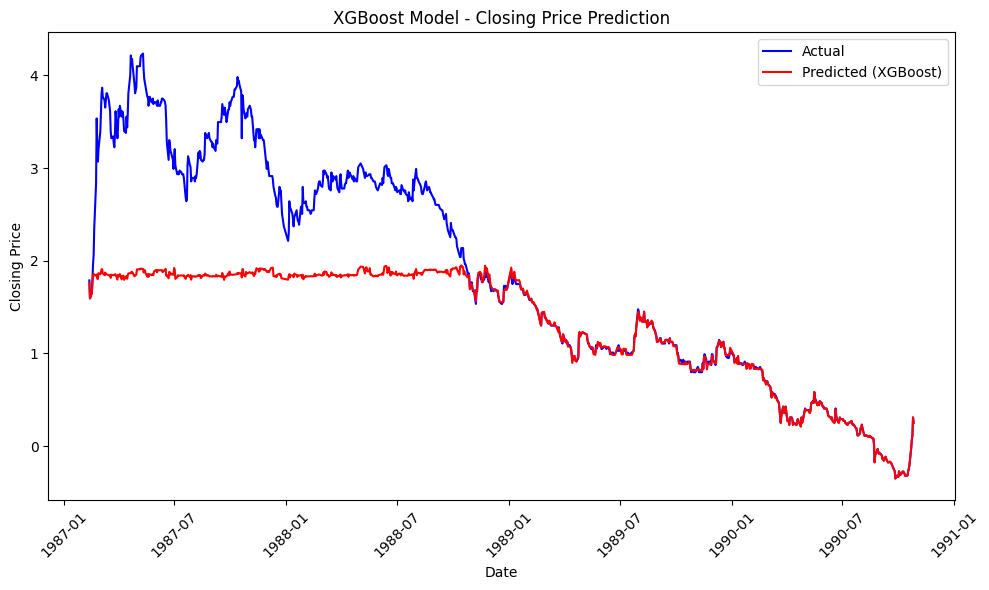

In [50]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Split data into training and testing sets (90% train, 10% test)
train_size = int(len(df) * 0.9)
train_data, test_data = df['Closing Price'][:train_size], df['Closing Price'][train_size:]

# Use your features as exogenous variables
exog_features = ['Open Price', 'Highest', 'Lowest', 'Volume', 'Change %', 'Volatility_20d', 
                 'Volatility_252d', 'MA_20d', 'MA_50d', 'Rolling_Std_20d', 'Rolling_Std_50d', 
                 'Price_Z', 'Volume_Z', 'Rolling_Mean', 'Rolling_Std', 'Weekly_MA', 
                 'Monthly_MA', 'RSI', 'EMA_12', 'EMA_26', 'MACD', 'ATR']
exog_train = df[exog_features][:train_size]
exog_test = df[exog_features][train_size:]

# Standardize the features
scaler = StandardScaler()
exog_train_scaled = scaler.fit_transform(exog_train)
exog_test_scaled = scaler.transform(exog_test)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_model.fit(exog_train_scaled, train_data)

# Make predictions
xgb_predictions = xgb_model.predict(exog_test_scaled)

# Evaluate performance
mse_xgb = mean_squared_error(test_data, xgb_predictions)
mae_xgb = mean_absolute_error(test_data, xgb_predictions)
mape_xgb = mean_absolute_percentage_error(test_data, xgb_predictions)
rsq_xgb = 1 - (sum((test_data - xgb_predictions)**2) / sum((test_data - np.mean(test_data))**2))

# Print evaluation metrics
print(f'MSE: {mse_xgb:.5f}, MAE: {mae_xgb:.5f}, MAPE: {mape_xgb:.5f}%, R-Squared: {rsq_xgb:.5f}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Date'][train_size:], test_data, label='Actual', color='blue')
plt.plot(df['Date'][train_size:], xgb_predictions, label='Predicted (XGBoost)', color='red')
plt.title('XGBoost Model - Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Model-3 : LSTM

Shape of X: (9128, 60, 22)
Shape of y: (9128,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - loss: 0.1350
Epoch 2/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0117
Epoch 3/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0088
Epoch 4/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0065
Epoch 5/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0076
Epoch 6/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0056
Epoch 7/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0056
Epoch 8/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 0.0058
Epoch 9/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.0053
Epoch 10/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.0051
Epoch 11/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0050
Epoch 12/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0046
Epoch 13/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0048
Epoch 14/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0043
Epoch 15/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 7

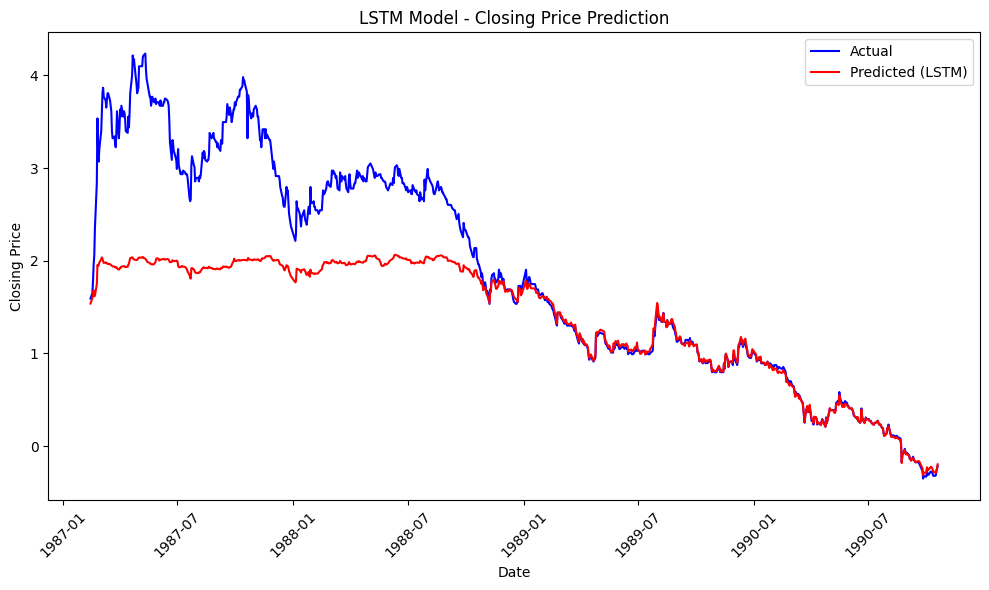

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Prepare the dataset for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :-1])  # Use all features except the target
        y.append(data[i + time_step, 0])  # Target variable
    return np.array(X), np.array(y)

# Create sequences (use the last 60 days as features)
time_step = 60
scaled_data = df[['Closing Price'] + exog_features].values  # Use the already scaled data
X, y = create_dataset(scaled_data, time_step)

# Debugging: Check shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Split data into training and testing sets (90% train, 10% test)
train_size = int(len(X) * 0.9)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input to be [samples, time steps, features] which is required for LSTM
num_features = X.shape[2]  # This should match the number of features used
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], num_features)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], num_features)

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], num_features)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))  # Output layer

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
lstm_predictions = model_lstm.predict(X_test)

# Inverse transform the predictions and actual values to get original scale
# Use the correct shape for concatenation
lstm_predictions_inv = lstm_predictions  # No inverse transformation needed since the data is already scaled
y_test_inv = y_test  # No inverse transformation needed since the data is already scaled

# Evaluate performance
mse_lstm = mean_squared_error(y_test_inv, lstm_predictions_inv)
mae_lstm = mean_absolute_error(y_test_inv, lstm_predictions_inv)

# Print evaluation metrics
print(f'MSE: {mse_lstm:.5f}, MAE: {mae_lstm:.5f}')

# Prepare the Date range for predictions
prediction_dates = df['Date'][train_size + time_step:len(df) - 1]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Date'][train_size + time_step:len(df) - 1], y_test_inv, label='Actual', color='blue')
plt.plot(prediction_dates, lstm_predictions_inv, label='Predicted (LSTM)', color='red')
plt.title('LSTM Model - Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Model-4 : ARIMAX

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

MSE: 0.00000, MAE: 0.00001, MAPE: 21.93465%, R-Squared: nan


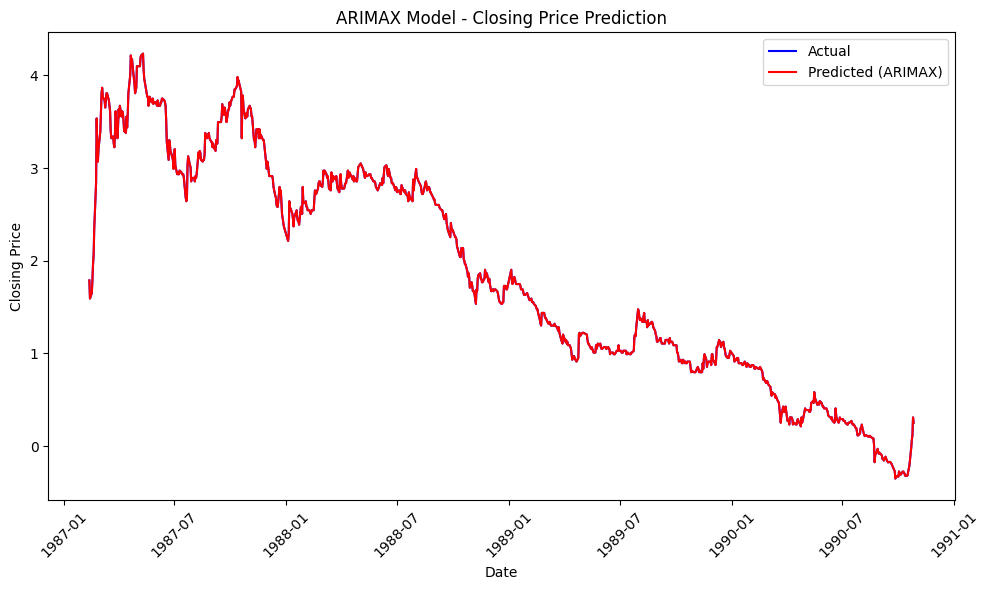

In [37]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Split data into training and testing sets (90% train, 10% test)
train_size = int(len(df) * 0.9)
train_data, test_data = df['Closing Price'][:train_size], df['Closing Price'][train_size:]

# Use your features as exogenous variables
exog_features = ['Open Price', 'Highest', 'Lowest', 'Volume', 'Change %', 'Volatility_20d', 
                 'Volatility_252d', 'MA_20d', 'MA_50d', 'Rolling_Std_20d', 'Rolling_Std_50d', 
                 'Price_Z', 'Volume_Z', 'Rolling_Mean', 'Rolling_Std', 'Weekly_MA', 
                 'Monthly_MA', 'RSI', 'EMA_12', 'EMA_26', 'MACD', 'ATR']
exog_train = df[exog_features][:train_size]
exog_test = df[exog_features][train_size:]

# Fit ARIMAX model with lagged features as exogenous variables
model_arimax = ARIMA(train_data, exog=exog_train, order=(5, 0, 0))  # Adjust p, d, q accordingly
arimax_fit = model_arimax.fit()

# Make predictions using exogenous variables for the test set
arimax_predictions = arimax_fit.forecast(steps=len(test_data), exog=exog_test)

# Evaluate performance
mse_arimax = mean_squared_error(test_data, arimax_predictions)
mae_arimax = mean_absolute_error(test_data, arimax_predictions)
mape_arimax = mean_absolute_percentage_error(test_data, arimax_predictions)
rsq_arimax = 1 - (sum((test_data - arimax_predictions)**2) / sum((test_data - np.mean(test_data))**2))

# Print evaluation metrics
print(f'MSE: {mse_arimax:.5f}, MAE: {mae_arimax:.5f}, MAPE: {mape_arimax:.5f}%, R-Squared: {rsq_arimax:.5f}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Date'][train_size:], test_data, label='Actual', color='blue')
plt.plot(df['Date'][train_size:], arimax_predictions, label='Predicted (ARIMAX)', color='red')
plt.title('ARIMAX Model - Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

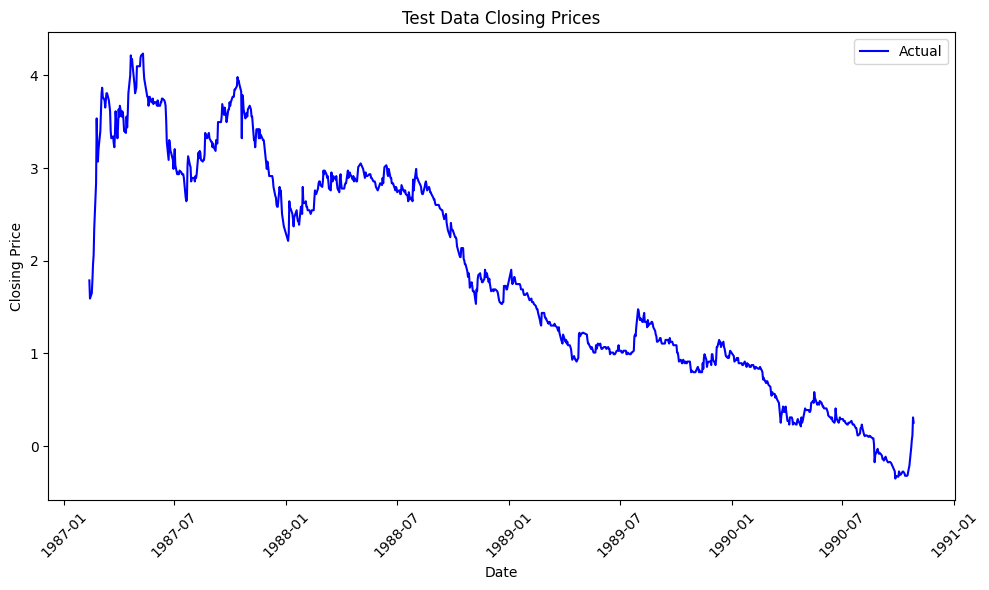

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'][train_size:], test_data, label='Actual', color='blue')
plt.title('Test Data Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
print("Actual Values:", test_data.head())
print("Predicted Values:", arimax_predictions[:5])

Actual Values: 8283    0.252114
8284    0.309598
8285    0.115344
8286    0.063807
8287   -0.019444
Name: Closing Price, dtype: float64
Predicted Values: 8270    0.252114
8271    0.309598
8272    0.115347
8273    0.063810
8274   -0.019441
Name: predicted_mean, dtype: float64
